<a href="https://colab.research.google.com/github/alitootoonchian/FinTech/blob/master/StockPredictARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np 
import pandas as pd 
import datetime as dt

import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas_datareader.data  as pdr
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = [12, 6]


In [76]:
ticker = 'GOOG'
n_days = 1
valid_per = 10
test_per = 10
total_years = 15
total_dates = total_years * 365
stocks = pdr.get_data_yahoo(ticker, dt.date.today() - dt.timedelta(total_dates), dt.date.today())
stocks = stocks.rename(str.lower, axis='columns')
stocks.head()

,high,low,open,close,volume,adj close
Date,,,,,,
2005-03-11,90.137146,88.244240,89.883095,88.568024,16116700.0,88.568024
2005-03-14,88.866905,85.962791,88.832039,87.168274,22376600.0,87.168274
2005-03-15,89.663918,86.779732,87.322693,88.971512,20922200.0,88.971512
2005-03-16,88.971512,87.178238,88.020081,87.472130,14265800.0,87.472130
2005-03-17,89.484589,87.571762,88.234276,89.310242,16583100.0,89.310242


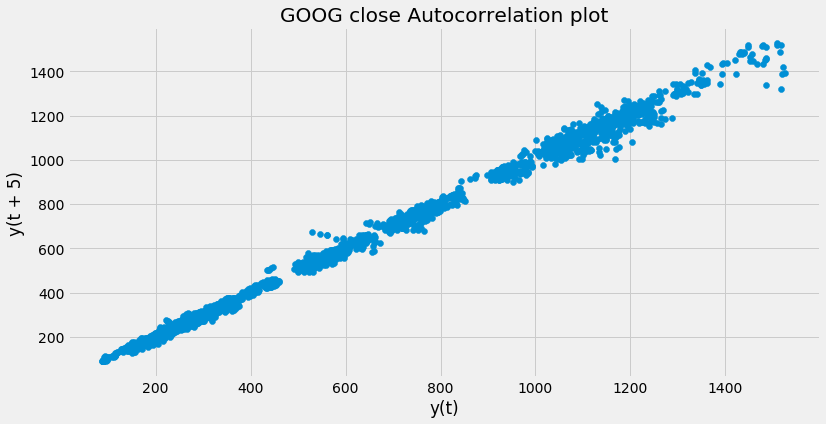

In [77]:
lag_plot(stocks['close'], lag=5)
plt.title(ticker + ' close Autocorrelation plot')
plt.show()

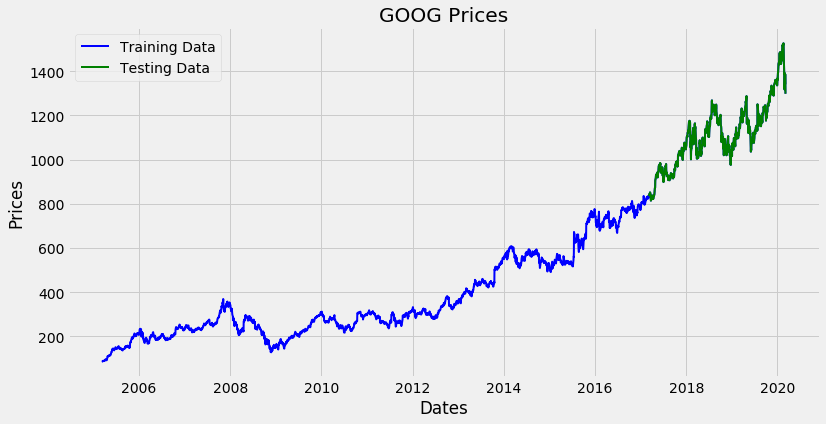

In [78]:
train_data, test_data = stocks[0:int(len(stocks)*0.8)], stocks[int(len(stocks)*0.8):]
plt.title(ticker + ' Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(stocks['close'], 'blue', label='Training Data', linewidth=2)
plt.plot(test_data['close'], 'green', label='Testing Data', linewidth=2)
plt.legend()
plt.show()

In [0]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

In [80]:
train_ar = train_data['close'].values
test_ar = test_data['close'].values
history = [x for x in train_ar]
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5, 1, 0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

Testing Mean Squared Error: 302.514
Symmetric mean absolute percentage error: 14.567


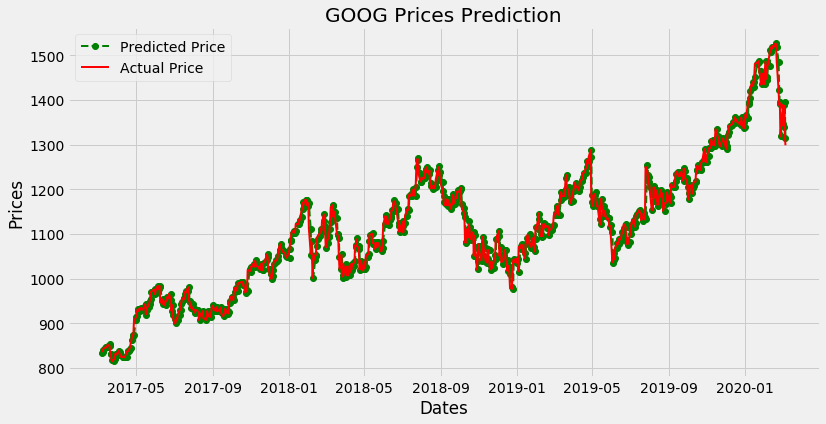

In [81]:
#plt.plot(stocks['open'], 'green', color='blue', label='Training Data', linewidth=2)
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', label='Predicted Price', linewidth=2)
plt.plot(test_data.index, test_data['close'], color='red', label='Actual Price', linewidth=2)
plt.title(ticker + ' Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()
plt.show()

Success Rate:95.49668874172185


,target,predict,target_ret,pred_ret,pred_ret_gold,success
Date,,,,,,
2017-03-08,835.369995,832.318347,NaN,NaN,3.514051,0
2017-03-09,838.679993,835.832397,3.309998,3.514051,3.037536,1
2017-03-10,843.250000,838.869933,4.570007,3.037536,4.525982,1
2017-03-13,845.539978,843.395916,2.289978,4.525982,2.219896,1
2017-03-14,845.619995,845.615812,0.080017,2.219896,-0.020617,0


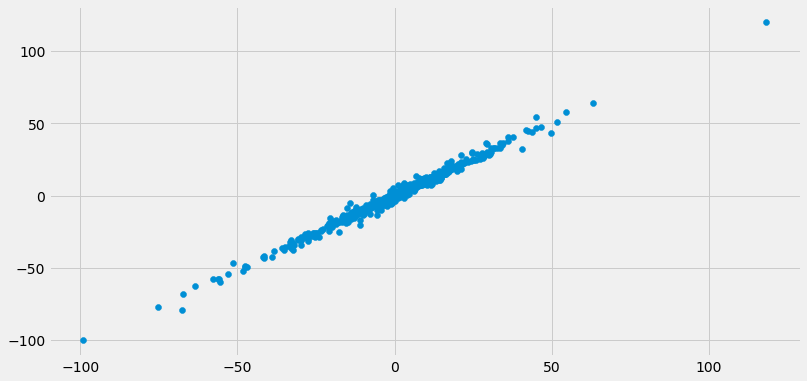

In [82]:
predict = [x[0] for x in predictions]
result = pd.DataFrame({'target': test_data['close'], 'predict': predict})
result['target_ret'] = result.target - result.target.shift(1)
result['pred_ret'] = result.predict - result.predict.shift(1)
result['pred_ret_gold'] = result.pred_ret.shift(-1)
result['success'] = ((result.target_ret * result.pred_ret_gold) > 0).astype(np.int)
print("Success Rate:{}".format(result.success.sum() * 100 / (len(result))))

plt.scatter(result.target_ret, result.pred_ret_gold)

result.head()